c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Результаты перекрестной проверки:
Блок 1: 0.9038461538461539
Блок 2: 0.9519230769230769
Блок 3: 0.875
Блок 4: 0.9711538461538461
Блок 5: 0.9519230769230769


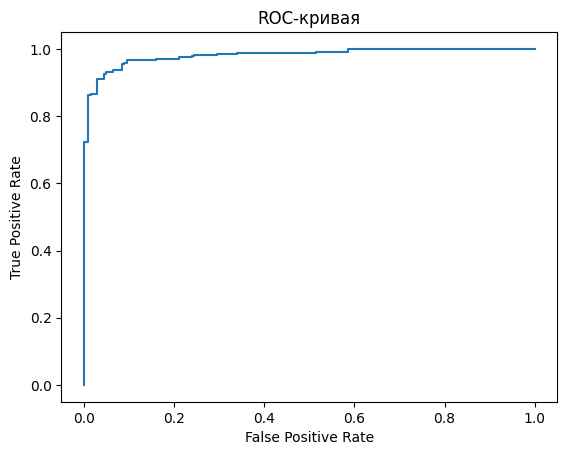

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Загрузка датасета
data = pd.read_csv('data.csv')

# Разделение данных на признаки и целевую переменную
X = data.drop('class', axis=1)
y = data['class']

# Преобразование значений 'Negative' и 'Positive' в 0 и 1
y = y.replace({'Negative': 0, 'Positive': 1})


X_encoded = pd.get_dummies(X)

# Создание и обучение модели
model = LogisticRegression()
model.fit(X_encoded, y)

# Перекрестная проверка модели
cv_scores = cross_val_score(model, X_encoded, y, cv=5)

# Вывод результатов перекрестной проверки
print("Результаты перекрестной проверки:")
for i, score in enumerate(cv_scores):
    print(f"Блок {i+1}: {score}")


# Получение предсказанных вероятностей
y_probs = model.predict_proba(X_encoded)[:, 1]

# Расчет значений для ROC-кривой
fpr, tpr, thresholds = roc_curve(y, y_probs)

# Построение ROC-кривой
plt.plot(fpr, tpr)
plt.title('ROC-кривая')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()